# Reading THEMIS ASI raw image data

Below we'll retrieve THEMIS ASI data, read it, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [1]:
import requests

In [2]:

url = "https://data.phys.ucalgary.ca/sort_by_project/THEMIS/asi/stream0/2020/03/29/inuv_themis17/ut07/20200329_0739_inuv_themis17_full.pgm.gz"
r = requests.get(url)

In [3]:
# save data to a local file
filename1 = "20200329_0739_inuv_themis17_full.pgm.gz"
with open(filename1, 'wb') as f:
    f.write(r.content)

## Read the data file

In [4]:
import themis_imager_readfile

In [5]:
img, meta, problematic_files = themis_imager_readfile.read(filename1)

In [6]:
# the imager takes a picture every 3 seconds, so a 1-minute file usually contains 20 images
print("Image dimensions: %d x %d" % (img.shape[0], img.shape[1]))
print("Number of images: %d" % (img.shape[2]))

Image dimensions: 256 x 256
Number of images: 20


In [7]:
# data for the first image
img[:,:,0]

array([[2160, 2145, 2183, ..., 2182, 2128, 2180],
       [2175, 2150, 2170, ..., 2149, 2137, 2142],
       [2168, 2145, 2146, ..., 2167, 2144, 2148],
       ...,
       [2151, 2161, 2151, ..., 2160, 2158, 2170],
       [2165, 2156, 2151, ..., 2133, 2139, 2165],
       [2180, 2158, 2133, ..., 2153, 2164, 2166]], dtype=uint16)

In [8]:
# metadata for first image
meta[0]

{'Revised': '2007-03-19',
 'Site unique ID': 'inuv',
 'Imager unique ID': 'themis17',
 'Project unique ID': 'THEMIS',
 'Imager model': 'starlight Xpress MX716 with THEMIS all-sky optics',
 'Imager comment': 'Inuvik',
 'Ccd type': 'Sony ICX249AL',
 'Ccd xsize': '752 pixels',
 'Ccd ysize': '290 pixels',
 'Ccd background': '2080',
 'Pixel depth': '16 bits',
 'Pixel aspect ratio': '0.5181',
 'Optical type': 'THEMIS all-sky',
 'Optical projection': 'a1=1.5,a3=0.0,b2=0.0,b4=0.0',
 'Optical center': 'x0=378,y0=152',
 'Computer name': 'inuv i686',
 'Operating system': 'Linux 2.6.32-431.el6.i686 #1 SMP Fri Nov 22 00:26:36 UTC 2013',
 'Site name': 'Inuvik',
 'Geodetic latitude': '68.41256',
 'Geodetic Longitude': '226.23039',
 'Geodetic altitude': '0.0',
 'NTP target': '127.127.1.0',
 'NTP delay': '0.000',
 'NTP offset': '0.000',
 'NTP jitter': '0.001',
 'Mode unique ID': 'full',
 'Mode sequence number': '43181',
 'CCD device': '/dev/ccdA',
 'Exposure options': 'WIDTH=512 HEIGHT=256 XBIN=2 YBIN=

## Visualize the image

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

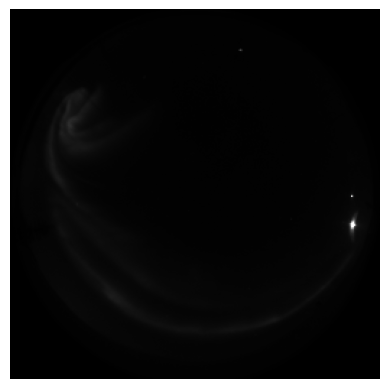

In [10]:
plt.imshow(img[:,:,0], cmap="gray")
plt.axis("off")
plt.show() 

# Let's scale the image so it's a bit brighter

Next we'll scale the image using a linear scale with a min and max cut-off. This allows us to easily brighten the image while not increasing the CCD readout noise.

In [11]:
import numpy as np

scale_min = 3000.0   # MUST be a float
scale_max = 14000.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 65535.0 / scale_diff
im_scaled = (img[:,:,0] - scale_min) * scale_ratio    # apply scale
im_scaled = im_scaled.clip(0, 65535) + 0.5            # limit to 0-65535 (the range of a 16-bit image)
im_scaled = im_scaled.astype(np.uint16)               # convert data type to 16-bit

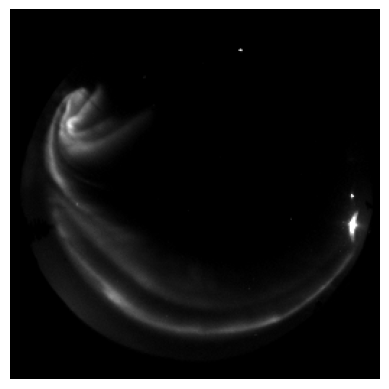

In [12]:
# scale the image with 3000 as the floor and 14000 as the ceiling, then display
plt.imshow(im_scaled, cmap="gray")
plt.axis("off")
plt.show() 

# Now lets look at the skymaps

In [13]:
# 2020-03-21 06:30 UTC in Gillam, Manitoba, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/THEMIS/asi/skymaps/inuv/inuv_20200323/themis_skymap_inuv_20200323-%2B_v02.sav"
r = requests.get(url)

In [14]:
# save data to a local file
filename2 = "themis_skymap_inuv_20200323-%2B_v02.sav"
with open(filename2, 'wb') as f:
    f.write(r.content)

In [15]:
import scipy.io
import copy

In [16]:
skymap_file=scipy.io.readsav(filename2, python_dict=True)['skymap']

In [17]:
skymap_file

rec.array([(rec.array([(b'Wed Aug 03 13:11:31 2022', b'hannah mcdonald', b'2020032309', b'+', b'20200323_UT09', b'\\\\bender\\data\\themis\\imager\\stream0\\2020\\03\\23\\inuv_themis17\\ut09\\*full.pgm*', b'write_skymap_file.pro', array([[ 0.00000000e+00,  1.65000000e+02,  0.00000000e+00,
                              -3.98000002e+00,  0.00000000e+00, -2.00000009e-03,
                               0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                             [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                               0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype='>f8'), array([-32.5       ,  -0.60000001,   0.        ], dtype='>f8'), array([375.20001221, 154.6000061 ], dtype='>f8'), array([1, 0], dtype=uint8), 0.518072, array([-1, -1], dtype='>i2'))          ],
                     dtype=[(('date_generated', 'DATE_GENERATED'), 'O'), (('author', 'AUTHOR')

In [18]:
skymap = {key: copy.copy(skymap_file[key][0]) for key in skymap_file.dtype.names}

In [19]:
skymap

{'GENERATION_INFO': rec.array([(b'Wed Aug 03 13:11:31 2022', b'hannah mcdonald', b'2020032309', b'+', b'20200323_UT09', b'\\\\bender\\data\\themis\\imager\\stream0\\2020\\03\\23\\inuv_themis17\\ut09\\*full.pgm*', b'write_skymap_file.pro', array([[ 0.00000000e+00,  1.65000000e+02,  0.00000000e+00,
                    -3.98000002e+00,  0.00000000e+00, -2.00000009e-03,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                   [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype='>f8'), array([-32.5       ,  -0.60000001,   0.        ], dtype='>f8'), array([375.20001221, 154.6000061 ], dtype='>f8'), array([1, 0], dtype=uint8), 0.518072, array([-1, -1], dtype='>i2'))          ],
           dtype=[(('date_generated', 'DATE_GENERATED'), 'O'), (('author', 'AUTHOR'), 'O'), (('valid_interval_start', 'VALID_INTERVAL_ST

In [20]:
skymap_file['FULL_MAP_LATITUDE']

array([array([[[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan]],

              [[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan]],

              [[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan]]]

In [21]:
for key in skymap:
        if hasattr(skymap[key], 'shape'):
            shape = skymap[key].shape
            if (len(shape) == 2) and (shape[0] == shape[1]):
                skymap[key] = skymap[key][::-1, :]  # For Az/El maps.
            elif (len(shape) == 3) and (shape[1] == shape[2]):
                skymap[key] = skymap[key][:, ::-1, :]  # For lat/lon maps

(257, 257)


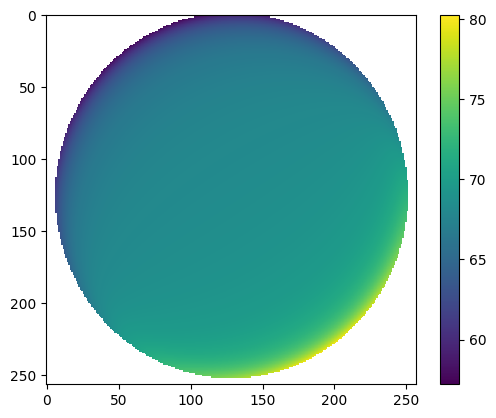

In [22]:
print(np.shape(skymap['FULL_MAP_LATITUDE'][1]))
plt.imshow(skymap['FULL_MAP_LATITUDE'][1]) #selects the 110km skymap as shape is (1,3,data)
plt.colorbar()

In [23]:
import asilib.asi
import asilib
from datetime import datetime 

In [24]:
asilib_asi = asilib.asi.themis('inuv', time=datetime(2020,3,29,7,38), load_images=False, alt=110)

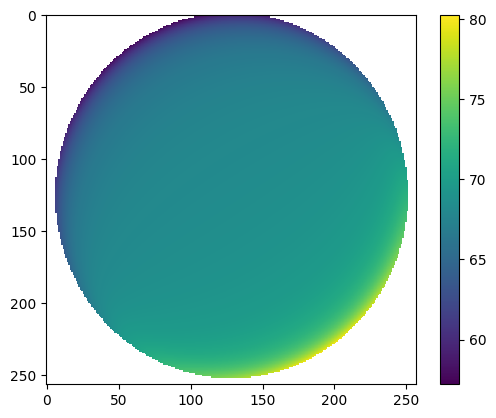

In [25]:
plt.imshow(asilib_asi.skymap['lat'])
plt.colorbar()

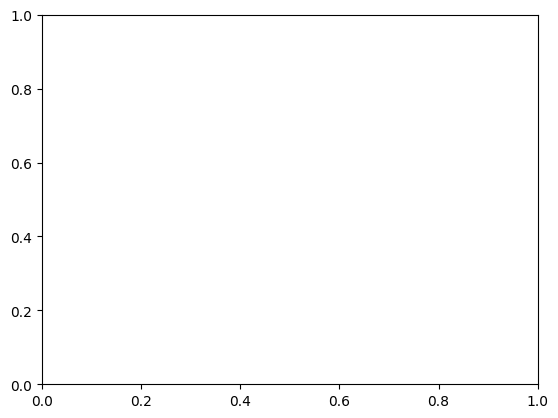

In [26]:
fig,axes = plt.subplots()
#asilib_asi._pcolormesh_nan(asilib_asi.skymap['lon'],asilib_asi.skymap['lat'], asilib_asi.skymap['lat'], axes)
plt.show()

C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\3460918571.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(asilib_asi.skymap['lon'],asilib_asi.skymap['lat'], asilib_asi.skymap['lat'])
C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\3460918571.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


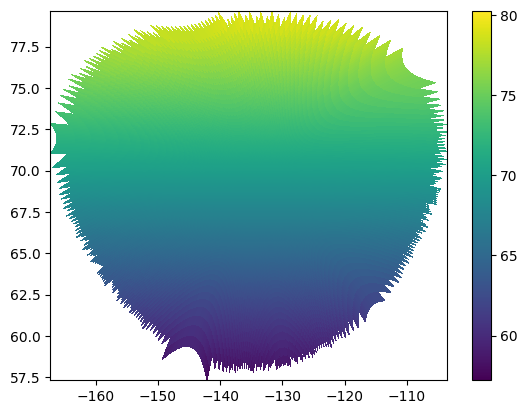

In [27]:
plt.pcolor(asilib_asi.skymap['lon'],asilib_asi.skymap['lat'], asilib_asi.skymap['lat'])
plt.colorbar()

C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\1277708397.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1])
C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\1277708397.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


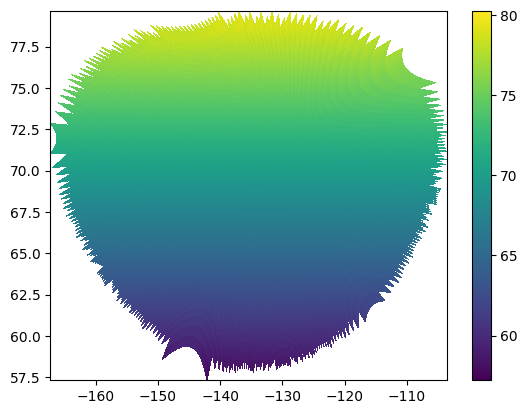

In [28]:
plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1])
plt.colorbar()

C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\964550965.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(skymap['FULL_MAP_LONGITUDE'][1]-360, skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1]- asilib_asi.skymap['lat'] )
C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\964550965.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


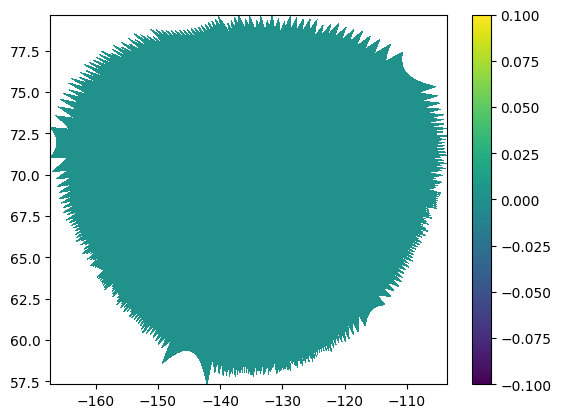

In [29]:
plt.pcolor(skymap['FULL_MAP_LONGITUDE'][1]-360, skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1]- asilib_asi.skymap['lat'] )
plt.colorbar()

Good we can reproduce asilibs result if we use the flip skymap according to IDL -> python convention

In [30]:
skymap_url = "https://data.phys.ucalgary.ca/sort_by_project/TREx/RGB/skymaps/yknf/yknf_20220913/rgb_skymap_yknf_20220913-%2B_v01.sav"
r = requests.get(skymap_url)

In [31]:
filename2 = "rgb_skymap_yknf_20220913-%2B_v01.sav"
with open(filename2, 'wb') as f:
    f.write(r.content)

skymap_file=scipy.io.readsav(filename2, python_dict=True)['skymap']

In [32]:
skymap = {key: copy.copy(skymap_file[key][0]) for key in skymap_file.dtype.names}

In [33]:
skymap

{'GENERATION_INFO': rec.array([(b'Fri May 26 14:59:46 2023', b'Megan Gillies', b'2023040510', b'+', b'20230405_UT10', b'\\\\bender.phys.ucalgary.ca\\data\\trex\\rgb\\private\\yknf_h5_to_merge\\stream0\\2023\\04\\05\\yknf_rgb-08\\ut10\\20230405_1000_yknf_rgb-08_full.h5', b'write_skymap_file.pro', array([[  0., 180.,   0.,  -1.,   0.,  -1.,   0.,   0.,   0.],
                   [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]],
                  dtype='>f8'), array([-26.        ,   4.        ,   0.99999999], dtype='>f8'), array([280. , 239.5], dtype='>f8'), array([0, 0], dtype=uint8), 1., array([   0, 5000], dtype='>i2'))                                                                                                                                               ],
           dtype=[(('date_generated', 'DATE_GENERATED'), 'O'), (('author', 'AUTHOR'), 'O'), (('valid_interval_start', 'VALID_INTERVAL_START'), 'O'), (('valid_interval_stop', 'VALID_INTERVAL_STOP'), 'O'), (('date_time_used

(3, 481, 554)


C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\3312652363.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1]) #still in IDL formatting
C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\3312652363.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


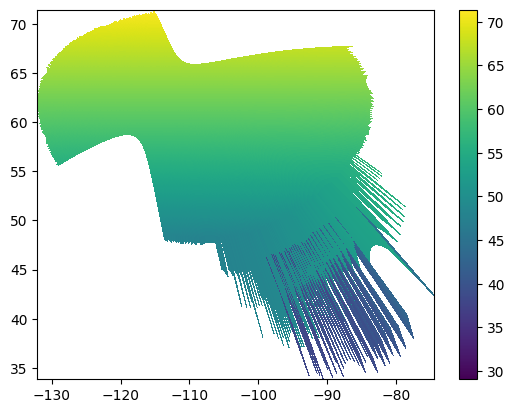

In [34]:
print(np.shape(skymap['FULL_MAP_LONGITUDE']))
plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1]) #still in IDL formatting
plt.colorbar()

In [35]:
for key in skymap: #Flips skymaps from IDL to python
        if hasattr(skymap[key], 'shape'):
            shape = skymap[key].shape
            if (len(shape) == 2) and (shape[0] == shape[1]):
                skymap[key] = skymap[key][::-1, :]  # For Az/El maps.
            elif (len(shape) == 3) and (shape[1] == shape[2]):
                skymap[key] = skymap[key][:, ::-1, :]  # For lat/lon maps

C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\1277708397.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1])
C:\Users\1101w\AppData\Local\Temp\ipykernel_34380\1277708397.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


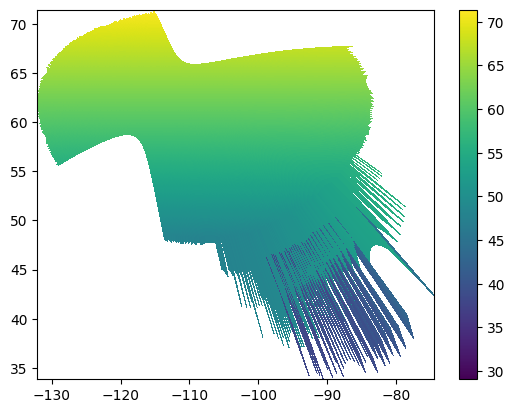

In [36]:
plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1])
plt.colorbar()

In [37]:
import datetime
import pyaurorax
import cartopy.crs

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

c:\Users\1101w\anaconda3\envs\pymc_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
# download a minute of RGB data from several sites
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2022, 12, 19, 14, 4)
end_dt = start_dt
site_uid_list = ['yknf']
data_download_objs = {}
for site_uid in site_uid_list:
    download_obj = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)
    data_download_objs[site_uid] = download_obj

# Read in the data site-by-site, as we need this separation for mosaicing
data_list = []
for site_uid, download_obj in data_download_objs.items():
    data_list.append(aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames))

In [39]:
# Get list of all skymaps in previous two years up to date of interest for each site
skymap_download_objs = {}
for site_uid in site_uid_list:
    download_obj = aurorax.data.ucalgary.download(
        "TREX_RGB_SKYMAP_IDLSAV",
        start_dt.replace(year=start_dt.year-2),
        start_dt,
        site_uid=site_uid,
    )
    skymap_download_objs[site_uid] = download_obj
skymaps = []
for site_uid, download_obj in skymap_download_objs.items():

    skymap = aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames[-1])
    skymaps.append(skymap.data[0])

skymaps

[Skymap(project_uid=rgb, site_uid=yknf, imager_uid=rgb-08, site_map_latitude=62.519848, site_map_longitude=245.686966, ...)]

In [40]:
# prepare the skymap data
prepped_skymap = at.mosaic.prep_skymaps(skymaps, 110, n_parallel=5)
prepped_skymap

Preparing skymaps: 100%|██████████| 1/1 [00:08<00:00,  8.85s/skymap]


MosaicSkymap(polyfill_lat=array(dims=(5, 265440), dtype=float64), polyfill_lon=array(dims=(5, 265440), dtype=float64), elevation=array(dims=(265440,), dtype=float32), site_uid_list=['yknf'])

In [41]:
# prepare the image data
prepped_images = at.mosaic.prep_images(data_list)
prepped_images

MosaicData(images=Dict[1 sites of array(dims=(480, 553))], timestamps=[20 timestamps], site_uid_list=['yknf'])

In [42]:
# define the intensity scales for each site
scale = {
    "yknf": [10, 110]
}

# Set timestamp to actually create mosaic frame for
mosaic_dt = datetime.datetime(2022, 12, 19, 14, 4)

# create projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# create mosaic
frame_num = 0
mosaic = at.mosaic.create(prepped_images, prepped_skymap, 0, projection_obj, image_intensity_scales=scale)
print(mosaic)

Mosaic(polygon_data=PolyCollection(...), cartopy_projection=Projection(+proj=nsper +a=6378137.0 +lon_0=-100.0 +lat_0=55.0 +h=35785831 +x_0=0 +y_0=0 +units=m +no_defs +type=crs))


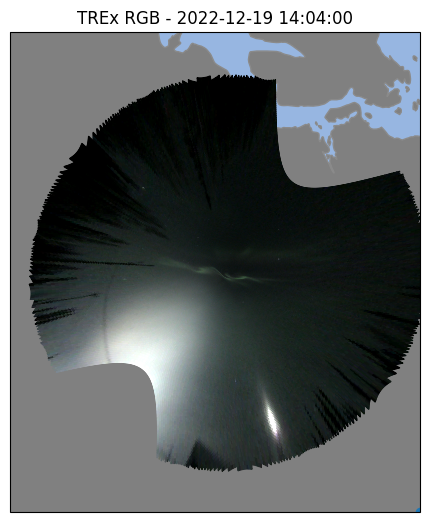

In [43]:
# plot mosaic
map_extent = [-125, -100, 55, 70]
fig,axes = mosaic.plot(map_extent, title="TREx RGB - %s" % (mosaic_dt.strftime("%Y-%m-%d %H:%M:%S")), returnfig=True)
axes.scatter(-144.4, 62.45)

Transition Region Explorer (TREx) RGB data is courtesy of Space Environment Canada (space-environment.ca). Use of the data must adhere to the rules of the road for that dataset.  Please see below for the required data acknowledgement. Any questions about the TREx instrumentation or data should be directed to the University of Calgary, Emma Spanswick (elspansw@ucalgary.ca) and/or Eric Donovan (edonovan@ucalgary.ca).

“The Transition Region Explorer RGB (TREx RGB) is a joint Canada Foundation for Innovation and Canadian Space Agency project developed by the University of Calgary. TREx-RGB is operated and maintained by Space Environment Canada with the support of the Canadian Space Agency (CSA) [23SUGOSEC].”


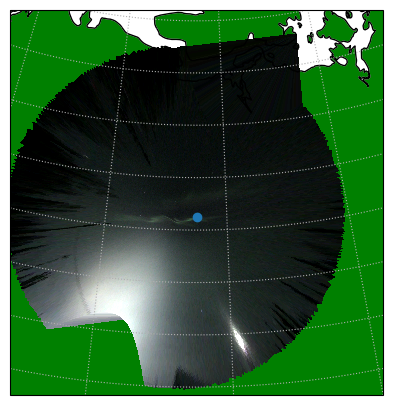

In [44]:
mosiac=asilib.asi.trex.trex_rgb('yknf', time=mosaic_dt, alt=110)

lon_bounds=(-125, -100)
lat_bounds=(55, 70)
ax = asilib.map.create_cartopy_map(lon_bounds=lon_bounds, lat_bounds=lat_bounds)
mosiac.plot_map(ax=ax, min_elevation=5, asi_label=False, color_bounds=[10,110])
ax.scatter(-144.4, 62.45)

Transition Region Explorer (TREx) RGB data is courtesy of Space Environment Canada (space-environment.ca). Use of the data must adhere to the rules of the road for that dataset.  Please see below for the required data acknowledgement. Any questions about the TREx instrumentation or data should be directed to the University of Calgary, Emma Spanswick (elspansw@ucalgary.ca) and/or Eric Donovan (edonovan@ucalgary.ca).

“The Transition Region Explorer RGB (TREx RGB) is a joint Canada Foundation for Innovation and Canadian Space Agency project developed by the University of Calgary. TREx-RGB is operated and maintained by Space Environment Canada with the support of the Canadian Space Agency (CSA) [23SUGOSEC].”


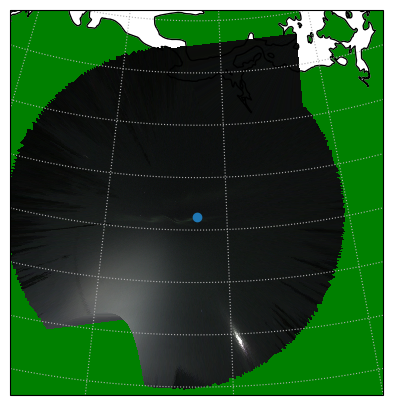

In [45]:
mosiac=asilib.asi.trex.trex_rgb('yknf', time=mosaic_dt, alt=110)

lon_bounds=(-125, -100)
lat_bounds=(55, 70)
ax = asilib.map.create_cartopy_map(lon_bounds=lon_bounds, lat_bounds=lat_bounds)
mosiac.plot_map(ax=ax, min_elevation=5, asi_label=False, color_bounds=[0,256])
ax.scatter(-144.4, 62.45)

Transition Region Explorer (TREx) RGB data is courtesy of Space Environment Canada (space-environment.ca). Use of the data must adhere to the rules of the road for that dataset.  Please see below for the required data acknowledgement. Any questions about the TREx instrumentation or data should be directed to the University of Calgary, Emma Spanswick (elspansw@ucalgary.ca) and/or Eric Donovan (edonovan@ucalgary.ca).

“The Transition Region Explorer RGB (TREx RGB) is a joint Canada Foundation for Innovation and Canadian Space Agency project developed by the University of Calgary. TREx-RGB is operated and maintained by Space Environment Canada with the support of the Canadian Space Agency (CSA) [23SUGOSEC].”


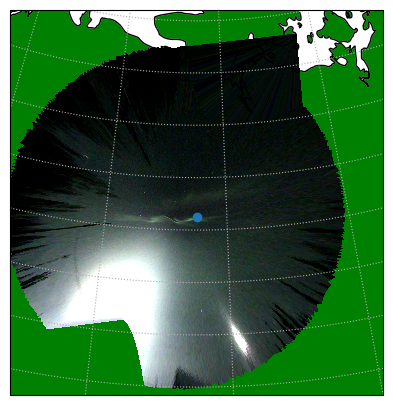

In [46]:
mosiac=asilib.asi.trex.trex_rgb('yknf', time=mosaic_dt, alt=110)

lon_bounds=(-125, -100)
lat_bounds=(55, 70)
ax = asilib.map.create_cartopy_map(lon_bounds=lon_bounds, lat_bounds=lat_bounds)
mosiac.plot_map(ax=ax, min_elevation=5, asi_label=False)
ax.scatter(-144.4, 62.45)